In [112]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Import Libraries

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

# !!pip install gap_stat
from gap_statistic import OptimalK
from tqdm import tqdm
from scipy import stats

# Read the dataset

In [114]:
# Load and read the dataset
try:
    from google.colab import drive
    drive.mount('/content/drive')
    heart_disease = pd.read_csv("/content/drive/MyDrive/ML/heart.csv", ";")

except:
    heart_disease = pd.read_csv("C:\\Users\\ibrah\\Downloads\\UCAS\\second_year_semester_1\\machine_learning\\Projects\\Heart_Disease\\heart.csv", ",")
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# heart_disease.columns = columns
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Check missing values

In [115]:
missing = pd.DataFrame({'null': heart_disease.isnull().sum()})

for column in heart_disease.columns:
    for i in range(len(heart_disease)):
        try:
            heart_disease[column][i] = float(heart_disease[column][i])

            # Return the int type for integer values
            if heart_disease[column][i] == int(heart_disease[column][i]):
                heart_disease[column][i] = int(heart_disease[column][i])
        except:
            heart_disease[column][i] = np.nan

missing['non-numeric before imputation'] =  heart_disease.isnull().sum()

# heart_disease = heart_disease.dropna()
# heart_disease.index = np.arange(0, len(heart_disease))
# missing['non-numeric after'] =  heart_disease.isnull().sum()

print(missing.head(14))

C:\Users\ibrah\AppData\Local\Temp/ipykernel_32272/719482065.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ibrah\AppData\Local\Temp/ipykernel_32272/719482065.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



          null  non-numeric before imputation
age          0                              0
sex          0                              0
cp           0                              0
trestbps     0                              0
chol         0                              0
fbs          0                              0
restecg      0                              0
thalach      0                              0
exang        0                              0
oldpeak      0                              0
slope        0                              0
ca           0                              0
thal         0                              0
target       0                              0


# Perform data imputation for missing variables
1. Using the 'SimpleImputer' class from the 'sklearn.impute' module, which allows you to replace missing values with the mean, median, or most frequent value of the column.
2. Using the 'fillna()' method from the 'pandas' library, which allows you to replace missing values with a specific value or using a method such as forward fill or backward fill.
3. Using the 'KNNImputer' class from the 'sklearn.impute' library, which uses k-Nearest Neighbors to impute missing values.

In [116]:
# Using the 'SimpleImputer' class from the 'sklearn.impute' module.

from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the dataset
imputer.fit(heart_disease)

# Use the imputer to transform the dataset and replace missing values with the mean
heart_disease = imputer.transform(heart_disease)
heart_disease = pd.DataFrame(heart_disease)


In [117]:
# Using the 'fillna()' method from the 'pandas' library.

# heart_disease.fillna(method='ffill', inplace=True)
# heart_disease.fillna(method='bfill', inplace=True)
heartheart_disease = heart_disease.interpolate()


In [118]:
# Using the 'KNNImputer' class from the 'sklearn.impute' library.

from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=2)

# Use the imputer to transform the dataset
heart_disease = imputer.fit_transform(heart_disease)
heart_disease = pd.DataFrame(heart_disease, columns = columns)



In [119]:
missing['non-numeric after imputation'] =  heart_disease.isnull().sum()
print(missing.head(14))

          null  non-numeric before imputation  non-numeric after imputation
age          0                              0                             0
sex          0                              0                             0
cp           0                              0                             0
trestbps     0                              0                             0
chol         0                              0                             0
fbs          0                              0                             0
restecg      0                              0                             0
thalach      0                              0                             0
exang        0                              0                             0
oldpeak      0                              0                             0
slope        0                              0                             0
ca           0                              0                             0
thal        

# Plot relationship between variables

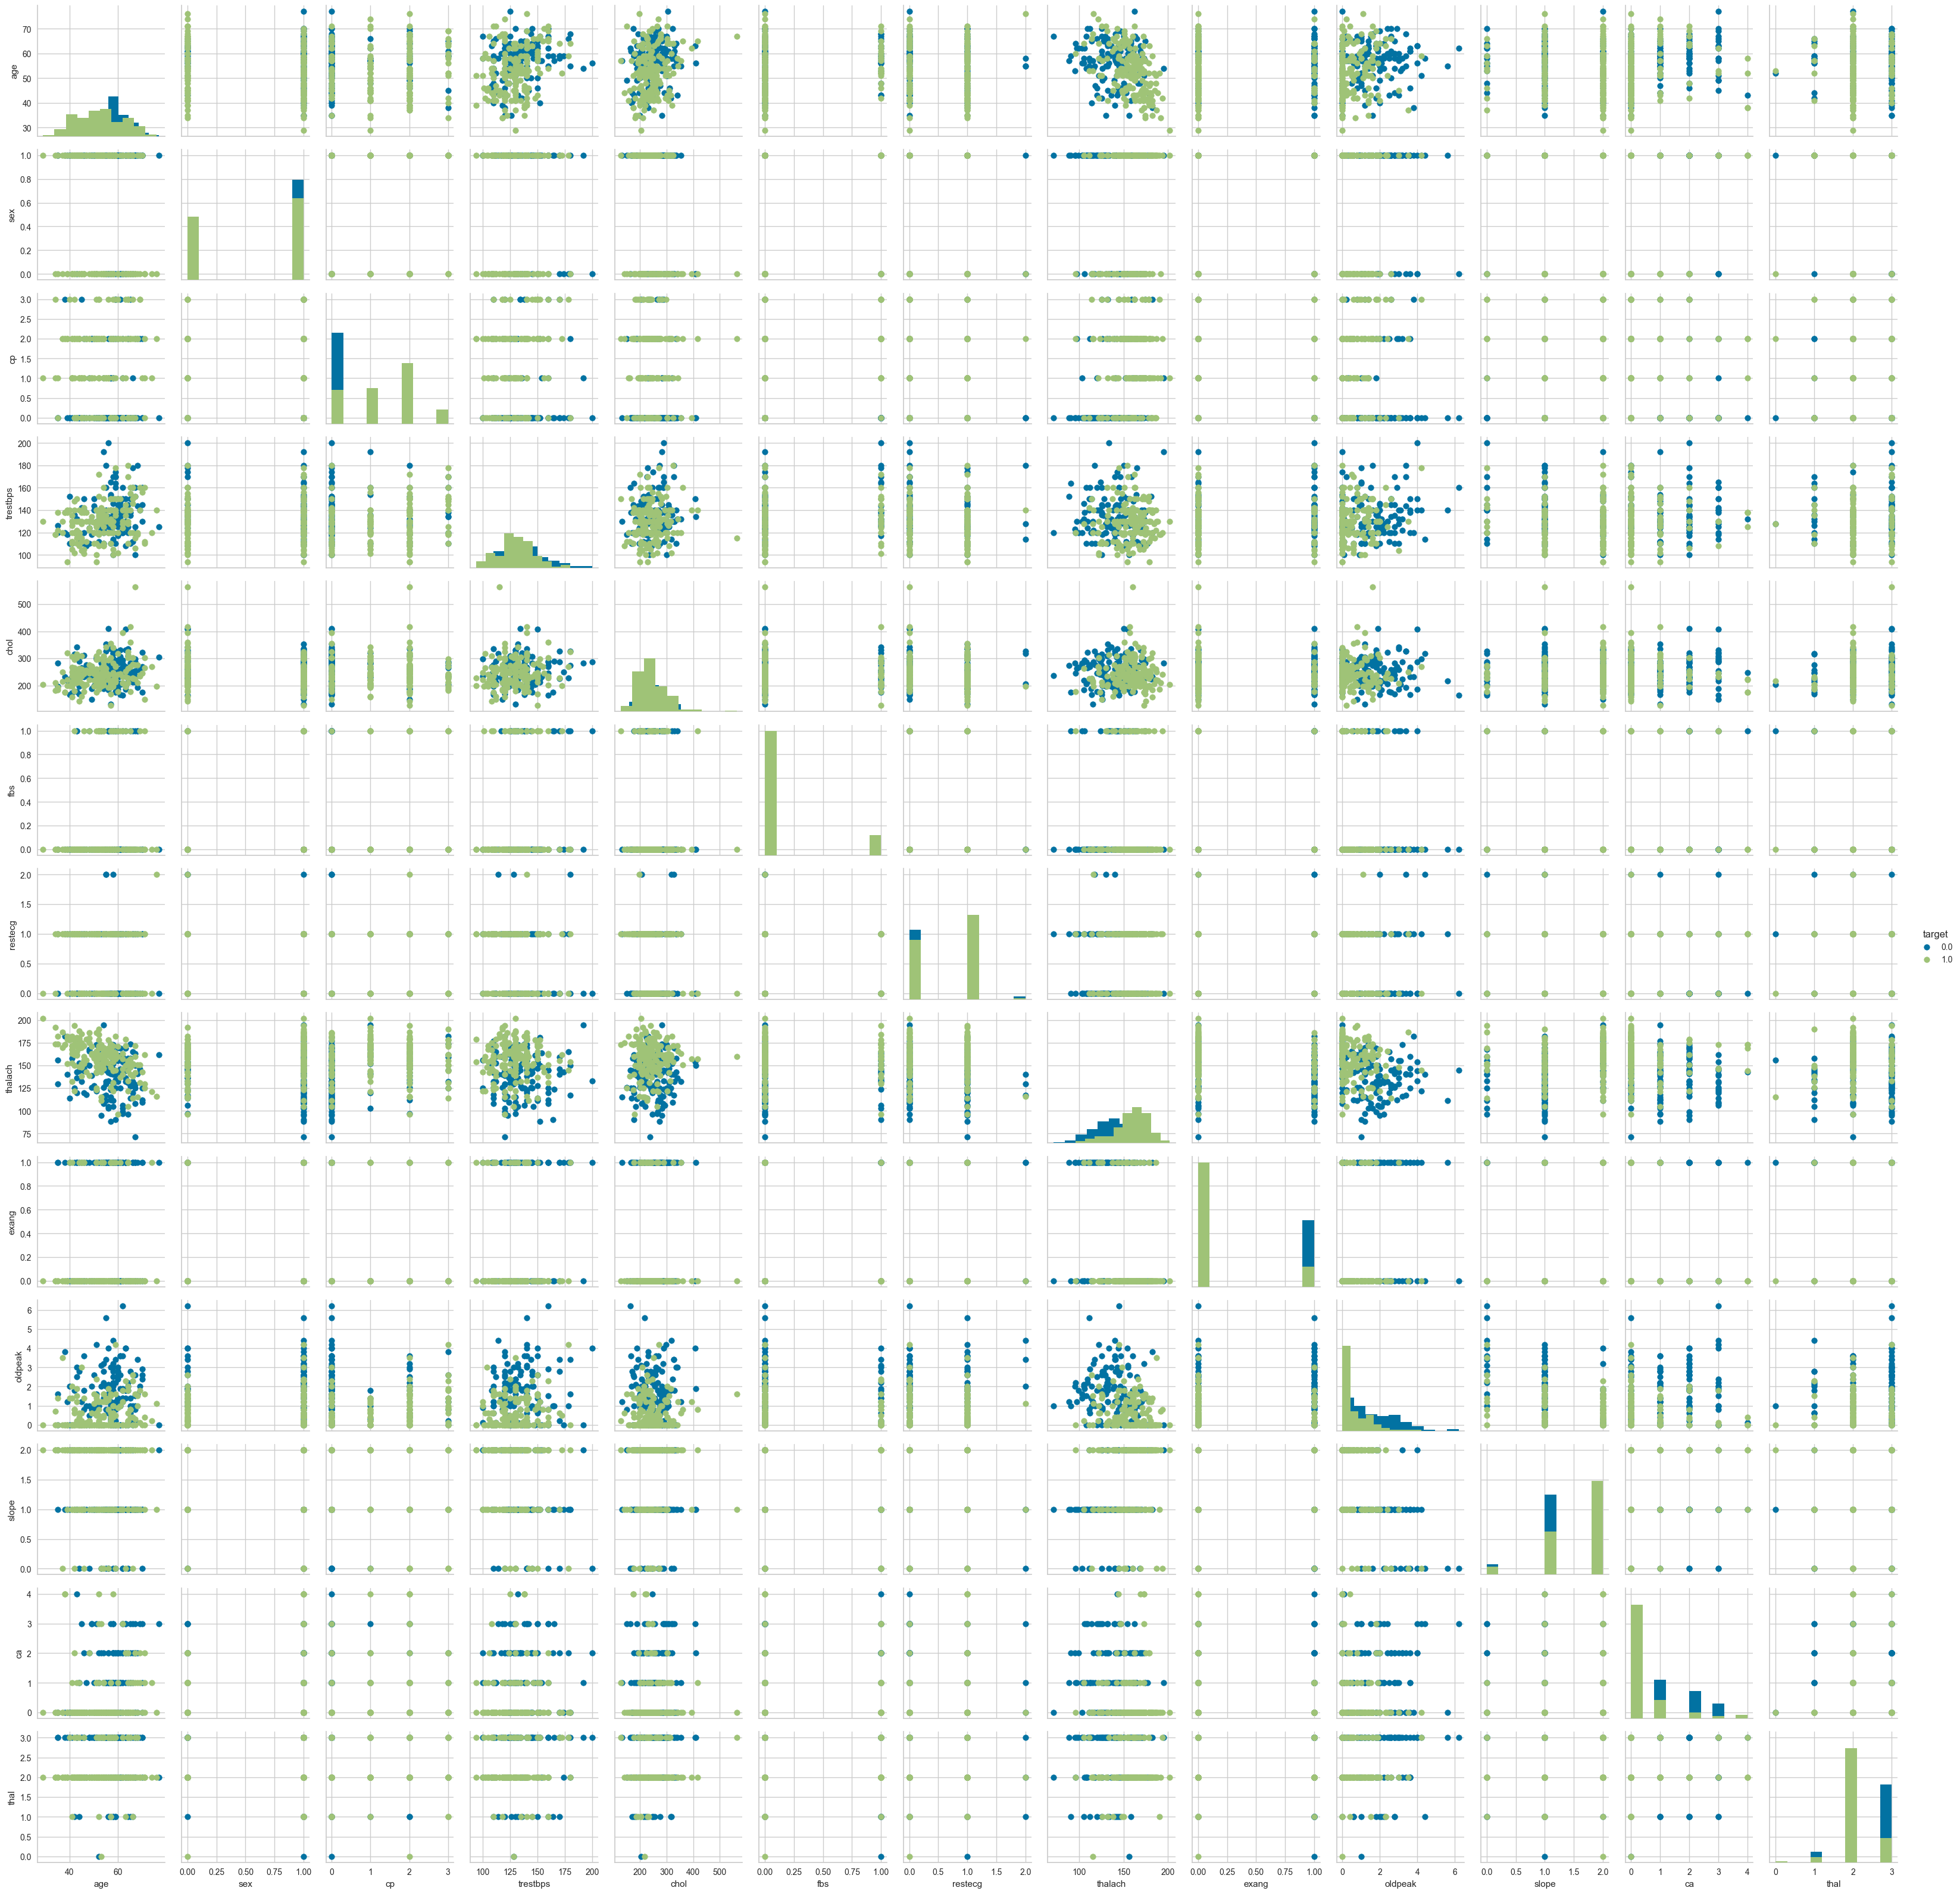

In [120]:
# PairGrid object with hue
graph = sns.PairGrid(heart_disease, hue='target')
# type of graph for diagonal
graph = graph.map_diag(plt.hist)
# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter)
# to add legends
graph = graph.add_legend()
# to show
plt.show()
# This code is contributed by Deepanshu Rusatgi.

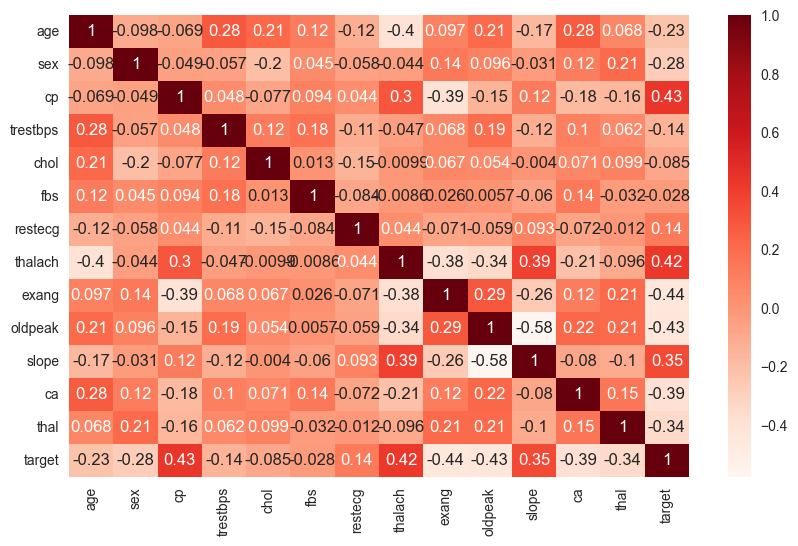

In [121]:
plt.figure(figsize=(10,6))
heart_disease_corr = heart_disease.corr()
sns.heatmap(heart_disease_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Identify correlated features or the ones that highly correlated with the label/outcome
1. Using 'stats.pearsonr' from 'scipy' library.
2. Using '.corr()' method.

In [122]:
# Coefficient of correlation
corr_coeff = {}
for column in heart_disease.columns:
    if column != "target":
        corr_coeff[column] = stats.pearsonr(heart_disease[column], heart_disease['target'])
corr_coeff = pd.DataFrame(corr_coeff)
print(corr_coeff.head(14).T)

                 0             1
age      -0.225439  7.524801e-05
sex      -0.280937  6.678692e-07
cp        0.433798  2.469712e-15
trestbps -0.144931  1.154606e-02
chol     -0.085239  1.387903e-01
fbs      -0.028046  6.267775e-01
restecg   0.137230  1.683990e-02
thalach   0.421741  1.697338e-14
exang    -0.436757  1.520814e-15
oldpeak  -0.430696  4.085346e-15
slope     0.345877  6.101611e-10
ca       -0.391724  1.491539e-12
thal     -0.344029  7.624880e-10


In [123]:
target_corr = heart_disease_corr['target'].drop('target')
corr_features = target_corr[target_corr.abs()>0.4]
highly_corr = target_corr[target_corr.abs()==target_corr.abs().max()]
non_corr_features = target_corr[target_corr.abs()<0.2]
heart_disease = heart_disease.drop(non_corr_features.index, axis=1)
print(corr_features)
heart_disease.head()

cp         0.433798
thalach    0.421741
exang     -0.436757
oldpeak   -0.430696
Name: target, dtype: float64


,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [124]:
for i in range(len(heart_disease['target'])):
    if np.all(heart_disease['target'][i] == int(heart_disease['target'][i])):
        heart_disease['target'] = heart_disease['target'].astype(int)
print(heart_disease['target'])

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int32


In [125]:
features = heart_disease
features = heart_disease.drop(['target'], axis=1)
target = heart_disease['target'].values

In [126]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thal,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


In [127]:
real_means = heart_disease.groupby("target").mean().T
real_means

target,0,1
age,56.601449,52.496970
sex,0.826087,0.563636
cp,0.478261,1.375758
thalach,139.101449,158.466667
exang,0.550725,0.139394
oldpeak,1.585507,0.583030
slope,1.166667,1.593939
ca,1.166667,0.363636
thal,2.543478,2.121212


# Encode outcome to a one-hot vector
1. Using the OneHotEncoder class from the sklearn.preprocessing module to encode an outcome variable to a one-hot vector.
2. Creating one_hot function and use it.

In [128]:
# converting labels to numbers
le = preprocessing.LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [129]:
# # Initialize the OneHotEncoder class
# encoder = OneHotEncoder()

# # Fit and transform the encoder on the outcome variable
# y_encoded = encoder.fit_transform(target.reshape(-1,1))

# # The output is a sparse matrix, to convert it to a dense matrix we can use .toarray()
# y_encoded = y_encoded.toarray()

# print(y_encoded)

In [130]:
# Create one_hot function to encode the outcome
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [131]:
# y_encoded = one_hot(target).T
# print(y_encoded)

Each unique value in the original outcome variable will correspond to a new column in the one-hot encoded outcome variable, and the entries in that column will be 1 if the original value was that unique value and 0 otherwise.
In this case, the outcome variable has 2 unique values 0, 1 so the one-hot encoded version has 2 columns.

# Task#1: Clustering in an unsupervised fashion

K-means clustering algorithm is a unsupervised learning algorithm which can help identify hidden patterns and cluster in the data which might not be obvious, handle various types of data, including continuous and categorical variables, and can also handle missing data. Clustering can help identify subpopulations that may respond differently to certain treatments, which can inform personalized medicine approaches and it is computationally efficient and can handle large datasets, making it suitable for analyzing large healthcare datasets.

**Remove redundant variables using Principal Component Analysis (PCA) or linear discriminant analysis (LDA)**
PCA finds the directions of maximum variance in the data, while LDA finds the directions that best separate different classes.

In [132]:
# # Implementing PCA with Python’s Sklearn Library
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# # applying scaling on training and test data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (X_test)


In [133]:
# # importing PCA class
# from sklearn.decomposition import PCA
# # creating object of the PCA class
# pca = PCA()
# # training PCA model on training data
# X_train = pca.fit_transform(X_train)
# # making predictions on test data
# X_test = pca.transform(X_test)

In [134]:
# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [135]:
# Normalizing the Data
normalized_features = normalize(scaled_features)

# Converting the numpy array into a pandas DataFrame
normalized_features = pd.DataFrame(normalized_features)
# normalized_features = pd.DataFrame(scaled_features)    # data without normalization or dimensionality reduction (for testing)


In [136]:
# Reducing the dimensions of the data
pca = PCA(n_components = 3)
X_principal = pca.fit_transform(normalized_features)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3']
X_principal.head()
# the transformed data can now be accessed in X_pca, and the explained variance ratio in pca.explained_variance_ratio_

,P1,P2,P3
0,0.047259,0.460986,0.641762
1,-0.035394,-0.000448,0.447221
2,-0.646102,0.213573,-0.303715
3,-0.675406,-0.304716,0.072374
4,-0.066089,0.274449,-0.783066


Text(0, 0.5, 'cumulative explained variance')

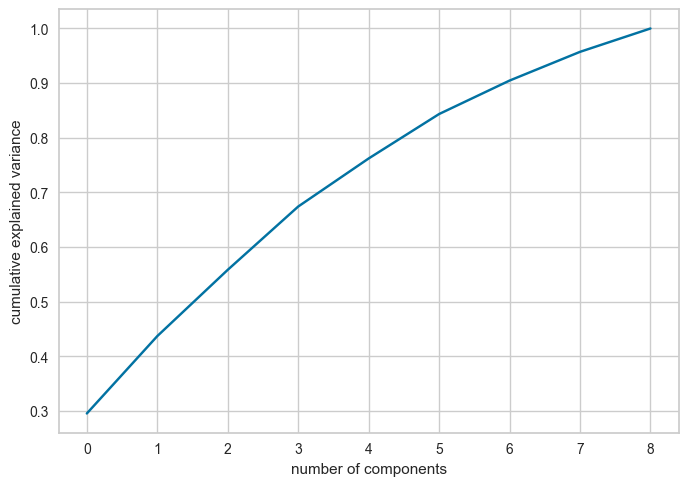

In [137]:
pca = PCA().fit(scaled_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Splitting the data into Training, Validation, and Testing sets. The suggested
split is 70%, 10%, and 20% held-out testing set, respectively.

In [138]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_principal, target, test_size=0.2, random_state=42)

# split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

**Show how you performed the model selection. For example, demonstrate the performance of variants of your model with different hyper-parameters, e.g., number of clusters and initialization when it comes to clustering methods.**

# Find optimal number of clusters
1. **Elbow Method**
   * Using '.inertia_'.
   * Using 'KElbowVisualizer' from 'yellowbrick.cluster' library.
   Inertia : Sum of distances of samples to their closest cluster center.
   The optimal number of clusters is where the elbow is located.
2. **Silhouette Method**
   * Using 'silhouette_score' method from 'sklearn.metrics' library.
   * Using 'SilhouetteVisualizer' from 'yellowbrick.cluster' library.
   The optimal number of clusters k is the one that maximize the average **silhouette** over a range of possible values for k.
3. **Gap Statistical Method**
   * Using ='OptimalK' from 'gap_statistics' library.
   The optimal number of clusters is the number of clusters where the gap statistic starts to increase.

In [139]:
model_labels = []
centroids = {}
inertia = []
silhouette = []

for k in range(2, 14):
    # model building
    model = KMeans(n_clusters=k)

    # model fit
    model = model.fit(X_principal)

    # get the output labels
    labels = model.labels_
    model_labels = labels

    # inertia
    inertia.append(model.inertia_)

    # silhouette
    silhouette.append(silhouette_score(X_principal, KMeans(n_clusters = k).fit_predict(X_principal)))

    # centroids
    centroids[k] = model.cluster_centers_

    print(f"when k = {k}---- inertia {model.inertia_} silhouette {silhouette_score(X_principal, labels)}")
print("Mean silhouette score:", np.mean(silhouette))

when k = 2---- inertia 104.51401263759809 silhouette 0.34724962941508575
when k = 3---- inertia 75.2882689361582 silhouette 0.366288377207468
when k = 4---- inertia 56.04106924800172 silhouette 0.38368816892854357
when k = 5---- inertia 46.173291931427926 silhouette 0.3797717905395778
when k = 6---- inertia 39.35409228655851 silhouette 0.36926543567402137
when k = 7---- inertia 35.29895098636177 silhouette 0.3620892649730198
when k = 8---- inertia 32.08186908198989 silhouette 0.3507599896513262
when k = 9---- inertia 28.904158035955547 silhouette 0.33917071899234036
when k = 10---- inertia 26.53627255552484 silhouette 0.3183088742927027
when k = 11---- inertia 24.18391778690299 silhouette 0.3250515176691326
when k = 12---- inertia 22.352034315308888 silhouette 0.3285318489429363
when k = 13---- inertia 20.91833436296386 silhouette 0.32307708161080806
Mean silhouette score: 0.3479463057923802


Text(0.5, 0, 'Number of clusters K')

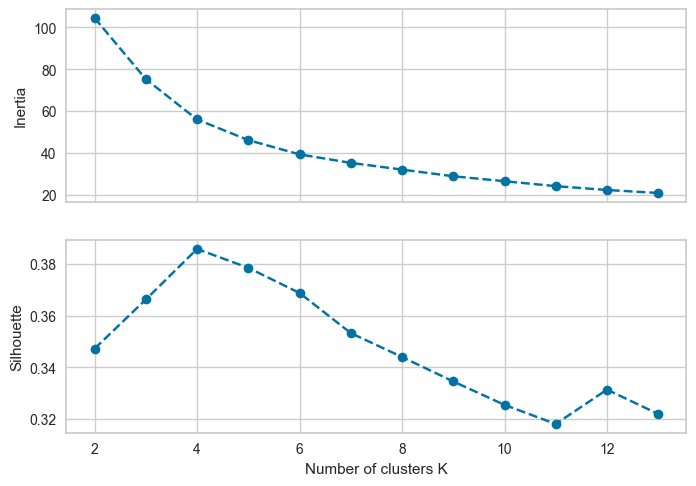

In [140]:
fig, ax = plt.subplots(2, 1, sharex = True)

plt.subplot(211) # row, column, plot
plt.plot(range(2, 14), inertia, "o--")
plt.ylabel("Inertia")

plt.subplot(212) # row, column, plot
plt.plot(range(2, 14), silhouette, "o--")
plt.ylabel("Silhouette")
plt.xlabel("Number of clusters K")

In [141]:
# #---------------------- Calinski Harabasz Score for K means
# plt.figure(figsize=(6.5,2.5))
# model = KMeans()
# # k is a range of the number of clusters.
# visualizer = KElbowVisualizer(model, k=(1, 10), metric="distortion", timings=False)
# visualizer.fit(X_principal)  # Fit the data to the visualizer
# visualizer.show()  # Finalize and generate the plot

# # Create SilhouetteVisualizer instance with KMeans instance
# plt.figure(figsize=(6.5,2.5))
# model = KMeans()
# visualizer = SilhouetteVisualizer(model, k=(2, 15), timings=False)
# # Fit the visualizer
# visualizer.fit(X_principal)  # Fit the data to the visualizer
# visualizer.show()  # Finalize and generate the plot


In [162]:

def KMeans_clustering_func(X, k):
    """
    K Means Clustering function, which uses the K Means model from sklearn.
    These user-defined functions *must* take the X (input features) and a k
    when initializing OptimalK
    """

    # Include any clustering Algorithm that can return cluster centers
    m = KMeans(n_clusters=k)
    m.fit(X)

    # Return the location of each cluster center, and the labels for each point.
    return m.cluster_centers_, m.predict(X)

#--------------------create a wrapper around OptimalK to extract cluster centers and cluster labels
# Create an instance of the OptimalK class
optimalK = OptimalK(clusterer=KMeans_clustering_func)

#--------------------Run optimal K on the input data (X_principal) and number of clusters
n_clusters = optimalK(X_principal, cluster_array=np.arange(2, 12))
print('Optimal clusters: ', n_clusters)

#--------------------Gap Statistics data frame
# gap = optimalK.gap_df[['n_clusters', 'gap_value']]
gap.head(16)

Optimal clusters:  11


,n_clusters,gap_value
0,2.0,0.386244
1,3.0,0.453100
2,4.0,0.501771
3,5.0,0.541225
4,6.0,0.489461
5,7.0,0.483182
6,8.0,0.468794
7,9.0,0.478172
8,10.0,0.500426
9,11.0,0.538686


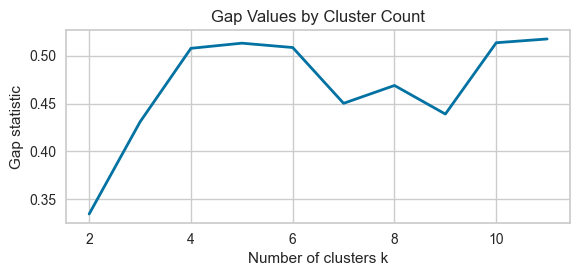

In [163]:
plt.figure(figsize=(6.5,2.5))
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=2)
# plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
#             optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')

plt.grid(True)
plt.xlabel('Number of clusters k')
plt.ylabel('Gap statistic')
plt.title('Gap Values by Cluster Count')
# plt.axvline(n_clusters, linestyle="--")
plt.show()


In [164]:
km_model = KMeans(n_clusters=2)
km_model.fit(features)

KMeans(n_clusters=2)

In [165]:
print(km_model.labels_)
print(km_model.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0]
[[ 52.02777778   0.64444444   1.22222222 165.11111111   0.17222222
    0.65055556   1.58888889   0.53333333   2.25555556]
 [ 57.78861789   0.7398374    0.59349593 127.01626016   0.55284553
    1.60894309   1.12195122   1.01626016   2.39837398]]


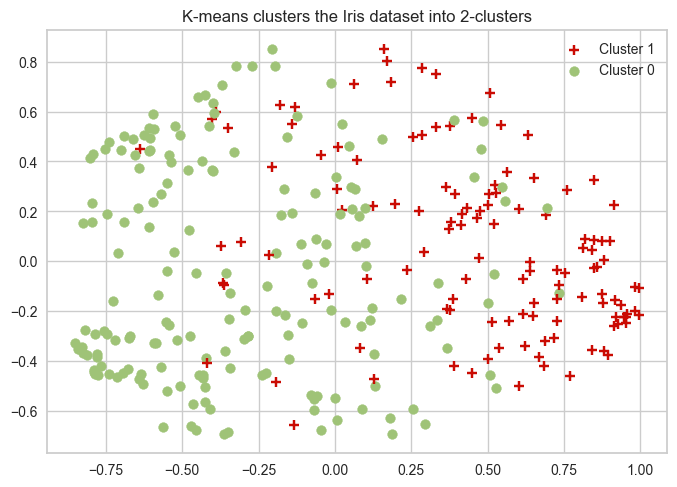

In [166]:
pca_a = PCA(n_components = 2)
X_principal_a = pca_a.fit_transform(X_principal)
X_principal_a = pd.DataFrame(X_principal_a)
X_principal_a.columns = ['P1', 'P2']

if "Clusters" not in X_principal_a:
  data_to_plot = X_principal_a.insert(2, "Clusters",km_model.labels_)


# print(X_principal_a)

# data_to_plot = X_principal.insert(3, "Clusters",km_model.labels_)
# print(km_model.labels_)
# input()
for i in range(0, X_principal_a.shape[0]):
  # print(X_principal_a["P1"][i],"\n")
  if X_principal_a["Clusters"][i] == 1:
    c1 = plt.scatter(X_principal_a["P1"][i],X_principal_a["P2"][i], c='r', marker='+')

  elif X_principal_a["Clusters"][i] == 0:
    c2 = plt.scatter(X_principal_a["P1"][i],X_principal_a["P2"][i],c='g', marker='o')

plt.legend([c1, c2],['Cluster 1', 'Cluster 0'])
plt.title('K-means clusters the Iris dataset into 2-clusters')
plt.show()


In [167]:
# %pip install plotly
import plotly.express as px

fig = px.scatter(X_principal_a, x="P1", y="P2", color="Clusters")
fig.show()

In [148]:
# # keep 3 dimentions 
# # ca_a = PCA(n_components = 2) 
# # X_principal_a = pca_a.fit_transform(X_principal) 
# # X_principal_a = pd.DataFrame(X_principal_a) 
# # X_principal_a.columns = ['P1', 'P2'] 
# from mpl_toolkits.mplot3d import Axes3D
# if "Clusters" not in X_principal:
#   data_to_plot = X_principal.insert(2, "Clusters",model.labels_)

# fig = plt.figure()
# ax = Axes3D(fig)

# # print(X_principal)

# # data_to_plot = X_principal.insert(3, "Clusters",model.labels_)
# # print(model.labels_)
# # input()
# for i in range(0, X_principal.shape[0]):
#   if X_principal["Clusters"][i] == 0:
#     c2 = ax.scatter(X_principal["P1"][i],X_principal["P2"][i],c='g', marker='o')
#   elif X_principal["Clusters"][i] == 1:
#     c1 = ax.scatter(X_principal["P1"][i], X_principal["P2"][i], c='r', marker='+')

# plt.legend([c1, c2],['Cluster 1', 'Cluster 0'])

# plt.title('K-means clusters GSM Cells dataset into 2-clusters')
# plt.show()

In [149]:
# plt.scatter(features.values[:,0], features.values[:,1], c=km_model.labels_, cmap='rainbow')
# plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:, 1], s=100, c='black')

In [183]:
from sklearn.cluster import AgglomerativeClustering
# training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [184]:
km_model = KMeans(n_clusters=2)
km_model.fit(features)
# km_model.labels_[km_model.labels_ == 0] = 2
# km_model.labels_ += 1 
clusters = pd.DataFrame({'target': heart_disease['target'], 'Cluster': km_model.labels_})
# print(clusters.head(33), '\n*Does not include Province of DKI Jakarta')
clusters.head()

,target,Cluster
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [186]:
analysis = heart_disease.drop(['target'], axis=1).copy()
analysis["labels"] = km_model.labels_

analysis

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,labels
0,63.0,1.0,3.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41.0,0.0,1.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57.0,1.0,0.0,115.0,1.0,1.2,1.0,1.0,3.0,0


In [187]:
pred_means = analysis.groupby("labels").mean().T
pred_means

labels,0,1
age,57.788618,52.027778
sex,0.739837,0.644444
cp,0.593496,1.222222
thalach,127.016260,165.111111
exang,0.552846,0.172222
oldpeak,1.608943,0.650556
slope,1.121951,1.588889
ca,1.016260,0.533333
thal,2.398374,2.255556


In [188]:
real_means

target,0,1
age,56.601449,52.496970
sex,0.826087,0.563636
cp,0.478261,1.375758
thalach,139.101449,158.466667
exang,0.550725,0.139394
oldpeak,1.585507,0.583030
slope,1.166667,1.593939
ca,1.166667,0.363636
thal,2.543478,2.121212


Non-Exhaustive Cross Validation : k-fold Cross Validation (k-fold CV)
# 5-fold Cross Validation
1. Divide the dataset into two parts: one for training, other for testing.
2. Train the model on the training set.
3. Validate the model on the test set.
4. Repeat 1-3 steps a couple of times. This number depends on the CV method
   that you are using.

In [189]:
from sklearn.model_selection import KFold

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2)

# Initialize the KFold object
kf = KFold(n_splits=5, shuffle=True)

for train_index, val_index in kf.split(X_principal):
    # Get the training and validation sets
    X_train, X_val = X_principal.values[train_index], X_principal.values[val_index]
    # Train your model on the training set and evaluate on the validation set
    model.fit(X_train, y_train)
    val_score = model.score(X_val, y_val)
    # Print the validation score for each fold
    print("Validation Score for Fold:", val_score)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_principal, target, test_size=0.2, random_state=42)

# split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

Validation Score for Fold: -5.132596975425998
Validation Score for Fold: -4.96455411854685
Validation Score for Fold: -4.445407799971991
Validation Score for Fold: -4.974814323402303
Validation Score for Fold: -4.66367543983712


## Running the corresponding evaluation metrics on each fold to demonstrate the performance of your model on the held-out testing set
* Accuracy (ACC)
* Precision
* Recall
* F1 Score
* Area Under ROC Curve (AUC-ROC)
* Silhouette Score
* Calinski-Harabasz Index (CHI)

In [196]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import matthews_corrcoef

acc = []
prec = []
rec = []
f1 = []
roc_auc = []
silh = []
chi = []

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2)


for train_index, test_index in kf.split(X_principal):

    # Fit the model on the training data
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_test)

    acc.append(round(accuracy_score(y_test, y_pred), 3))
    prec.append(round(precision_score(y_test, y_pred), 3))
    rec.append(round(recall_score(y_test, y_pred), 3))
    f1.append(round(f1_score(y_test, y_pred), 3))
    roc_auc.append(round(roc_auc_score(y_test, y_pred), 3))
    silh.append(round(silhouette_score(X_test, y_pred), 3))
    chi.append(round(calinski_harabasz_score(X_test, y_pred), 3))

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
c_report = classification_report(y_test,y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
mcc = matthews_corrcoef(y_test, y_pred)
print(c_report)

print(" Accuracy:", acc)
print("\n Precision:", prec)
print("\n Recall:", rec)
print("\n F1 Score:", f1)
print("\n AUC-ROC:", roc_auc)
print("\n Silhouette score:", silh)
print("\n Calinski-Harabasz Index:", chi)


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

 Accuracy: [0.164, 0.836, 0.836, 0.164, 0.836]

 Precision: [0.194, 0.844, 0.867, 0.194, 0.867]

 Recall: [0.188, 0.844, 0.812, 0.188, 0.812]

 F1 Score: [0.19, 0.844, 0.839, 0.19, 0.839]

 AUC-ROC: [0.163, 0.836, 0.837, 0.163, 0.837]

 Silhouette score: [0.404, 0.412, 0.404, 0.404, 0.404]

 Calinski-Harabasz Index: [50.705, 51.718, 50.705, 50.705, 50.705]


In [195]:
from sklearn import metrics

mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
mean_sqrt_squared_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Aboslute Error:', mean_absolute_error)
print('Mean Squared Error:', mean_squared_error)
print('Root Mean Squared Error:', mean_sqrt_squared_error)

Mean Aboslute Error: 0.8360655737704918
Mean Squared Error: 0.8360655737704918
Root Mean Squared Error: 0.9143662142547109


# Comparison the model’s performance after you normalize and/or reduce the dimensionality of the data.

When we run the model with processing the data, e.g., with normalization and dimensionality reduction, we see that the evaluation metrics =

Accuracy: [0.14754098360655737, 0.8360655737704918, 0.14754098360655737, 0.8524590163934426, 0.8524590163934426]

Precision: [0.16666666666666666, 0.8666666666666667, 0.16666666666666666, 0.8709677419354839, 0.8709677419354839]

Recall: [0.15625, 0.8125, 0.15625, 0.84375, 0.84375]

F1 Score: [0.16129032258064516, 0.8387096774193549, 0.16129032258064516, 0.8571428571428571, 0.8571428571428571]

AUC-ROC: [0.14709051724137934, 0.8372844827586207, 0.14709051724137934, 0.8529094827586207, 0.8529094827586207]

Silhouette score: [0.41995374267055896, 0.41884007711971993, 0.41995374267055896, 0.41995374267055896, 0.41995374267055896]

Calinski-Harabasz Index: [53.176434394063236, 53.13100261363819, 53.176434394063236, 53.176434394063236, 53.176434394063236]

for each fold and its errors =

Mean Aboslute Error: 0.14754098360655737
Mean Squared Error: 0.14754098360655737
Root Mean Squared Error: 0.3841106397986879

but when we run it without processing the data, the evaluation metrics =

Accuracy: [0.14754098360655737, 0.8524590163934426, 0.8524590163934426, 0.14754098360655737, 0.8524590163934426]

Precision: [0.14285714285714285, 0.8484848484848485, 0.8484848484848485, 0.14285714285714285, 0.8484848484848485]

Recall: [0.125, 0.875, 0.875, 0.125, 0.875]

F1 Score: [0.13333333333333333, 0.8615384615384615, 0.8615384615384615, 0.13333333333333333, 0.8615384615384615]

AUC-ROC: [0.14870689655172414, 0.8512931034482758, 0.8512931034482758, 0.14870689655172414, 0.8512931034482758]

Silhouette score: [0.4089178105391706, 0.4089178105391706, 0.4089178105391706, 0.4089178105391706, 0.4089178105391706]

Calinski-Harabasz Index: [46.698375717305, 46.698375717305, 46.698375717305, 46.698375717305, 46.698375717305]

for each fold and its errors =

Mean Aboslute Error: 0.14754098360655737
Mean Squared Error: 0.14754098360655737
Root Mean Squared Error: 0.3841106397986879

which is the same is somewhat with the processing algorithms

There are several reasons why a model might perform just as well without processing the data, even though it's a common practice to process the data before training a model. Some of the possible reasons are:

* The data is already in a suitable format for the model: If the data is already in a format that is compatible with the model, then there may be no need to perform any additional processing. For example, if the model expects data to be in a certain range and the data is already in that range, then normalization may not be necessary.

* The data is not complex: If the data is not very complex, then the model may be able to extract the relevant features and patterns without additional processing. In this case, the model may not benefit from normalization or dimensionality reduction.

* The model is robust: Some models, such as decision trees, are known to be robust to variations in the data and can handle noisy or incomplete data. Therefore, these models may not require data processing.

* The data is already in low dimension: Some dimensionality reduction techniques like PCA or LDA, are used to reduce the dimensionality of high-dimensional datasets. If the data is already in a low-dimensional space, then these techniques may not be necessary.


### Comparison between Logistic Regression & K-means Clustering
With K-means clustering, we get from the Evaluation Metrecs (classification_report and accuracy score) on train-test sets 81% precision, 86% recall, 83% f1-score in predicting the labels 0 (Not Heart Disease) and 87% precision, 81% recall, 84% f1-score for the 1 labels (with Heart Disease).
### Conclusion
Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.

# Lessons learned from this project
It's worth noting that, the performance of a model depends on many factors such as the nature of the data, the model selected, and the problem being solved. It is important to evaluate the performance of the model with and without preprocessing, and to select the approach that produces the best results.

# The rationale behind ML formulation
The rationale behind using clustering as a formulation in machine learning is to group similar data points together in clusters. Clustering algorithms, such as k-means and hierarchical clustering, use a variety of techniques to identify patterns and relationships within a dataset, and then group similar data points together based on those patterns. This can be useful for a variety of applications, including image recognition, natural language processing, and customer segmentation. Additionally, clustering can be used as a pre-processing step for other machine learning tasks, such as classification or anomaly detection, to improve the performance of the overall system.

# There are several limitations of clustering models:

* Assumptions about the data: Clustering algorithms make assumptions about the data, such as the shape of clusters and the number of clusters present. If these assumptions are not met, the algorithm may not perform well.

* Sensitivity to initial conditions: Some clustering algorithms, such as k-means, are sensitive to the initial conditions, meaning that the final clusters obtained can be different depending on the starting points of the algorithm.

* Difficulty in determining the number of clusters: Determining the optimal number of clusters for a dataset can be a challenging task. Some algorithms, such as the elbow method, can be used to estimate the number of clusters, but they may not always be accurate.

* Overfitting: Clustering algorithms can overfit to the data, especially when the number of clusters is high. This can lead to clusters that are too specific and not generalizable to new data.

* Scalability: Clustering algorithms can become computationally expensive as the number of data points increases, making it difficult to scale the algorithm to large datasets.

* evaluation: Clustering models are unsupervised, which means that it is difficult to evaluate the performance of the model.

* Not appropriate for all types of data: Clustering algorithms are not appropriate for all types of data, such as data with a clear linear or non-linear structure.